<a href="https://colab.research.google.com/github/santoshgurujula/Springboard/blob/master/DataWrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# First, import the relevant modules
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import glob as gb


In [2]:
#pointing the path to google drive folder
%cd '/content/drive/My Drive/Springboard/data'
!ls

/content/drive/My Drive/Springboard/data
BOM500002.csv  BOM500009.csv  BOM500013.csv  BOM500023.csv
BOM500003.csv  BOM500010.csv  BOM500014.csv  DJI.csv
BOM500008.csv  BOM500012.csv  BOM500020.csv  nasdl.csv


In [0]:
#to read only BSE stock csv files
pattern='BOM*.csv'
#read csv files 
csv_files=gb.glob(pattern)

In [4]:
#print list of data files
print(csv_files)

['BOM500002.csv', 'BOM500003.csv', 'BOM500008.csv', 'BOM500009.csv', 'BOM500010.csv', 'BOM500012.csv', 'BOM500013.csv', 'BOM500014.csv', 'BOM500020.csv', 'BOM500023.csv']


In [0]:
# Copy multiple files to single DF
# Create an empty list: frames
frames = []


In [0]:
#  Iterate over csv_files
for csv in csv_files:
    #  Read csv into a DataFrame: df
    df = pd.read_csv(csv)    
    # Append df to frames
    frames.append(df)

In [0]:
# Concatenate frames into a single DataFrame: uber
share_price_df = pd.concat(frames)

In [8]:
# Print the shape of share_price_df
print(share_price_df.shape)


(7248, 15)


In [9]:
# Print the head of share_price_df
print(share_price_df.head())


   Unnamed: 0        Date    Open  ...  Spread H-L  Spread C-O  stockname
0           0  2019-12-31  1305.0  ...        30.0      -20.90  BOM500002
1           1  2019-12-30  1277.0  ...        50.0       10.35  BOM500002
2           2  2019-12-27  1280.0  ...        30.0       -4.25  BOM500002
3           3  2019-12-26  1265.0  ...        43.0        3.50  BOM500002
4           4  2019-12-24  1278.5  ...        38.5      -23.35  BOM500002

[5 rows x 15 columns]


In [10]:
print(share_price_df.columns)

Index(['Unnamed: 0', 'Date', 'Open', 'High', 'Low', 'Close', 'WAP',
       'No. of Shares', 'No. of Trades', 'Total Turnover',
       'Deliverable Quantity', '% Deli. Qty to Traded Qty', 'Spread H-L',
       'Spread C-O', 'stockname'],
      dtype='object')


In [0]:
#Drop unwanted columns
share_price_df=share_price_df.drop(labels=['Unnamed: 0'],axis=1)



In [12]:
share_price_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'WAP', 'No. of Shares',
       'No. of Trades', 'Total Turnover', 'Deliverable Quantity',
       '% Deli. Qty to Traded Qty', 'Spread H-L', 'Spread C-O', 'stockname'],
      dtype='object')

In [0]:
#Sort based on date in ascending order
share_price_df=share_price_df.sort_values(['stockname','Date'],ascending=True)

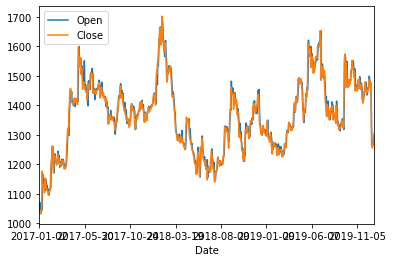

In [0]:
#Plot  stock
share_price_df[share_price_df['stockname']=='BOM500002'].plot(x='Date',
                    y=['Open','Close'],kind='line')


In [15]:
#Pivot based on stockname for only Close price
share_price_pivot_df=share_price_df.pivot(index='Date', columns='stockname').reset_index()
share_price_pivot_df.head()

Date      Open            ... Spread C-O                    
stockname             BOM500002 BOM500003  ...  BOM500014 BOM500020 BOM500023
0          2017-01-02    1045.0    129.00  ...      -0.13     -0.25       NaN
1          2017-01-03    1069.9    132.30  ...      -0.04     -0.20      0.00
2          2017-01-04    1050.0    134.15  ...      -0.01      0.65       NaN
3          2017-01-05    1051.9    132.00  ...       0.07      2.60     -0.05
4          2017-01-06    1037.0    132.90  ...       0.09     -0.90       NaN

[5 rows x 121 columns]

In [16]:
share_price_pivot_df.columns

MultiIndex([(      'Date',          ''),
            (      'Open', 'BOM500002'),
            (      'Open', 'BOM500003'),
            (      'Open', 'BOM500008'),
            (      'Open', 'BOM500009'),
            (      'Open', 'BOM500010'),
            (      'Open', 'BOM500012'),
            (      'Open', 'BOM500013'),
            (      'Open', 'BOM500014'),
            (      'Open', 'BOM500020'),
            ...
            ('Spread C-O', 'BOM500002'),
            ('Spread C-O', 'BOM500003'),
            ('Spread C-O', 'BOM500008'),
            ('Spread C-O', 'BOM500009'),
            ('Spread C-O', 'BOM500010'),
            ('Spread C-O', 'BOM500012'),
            ('Spread C-O', 'BOM500013'),
            ('Spread C-O', 'BOM500014'),
            ('Spread C-O', 'BOM500020'),
            ('Spread C-O', 'BOM500023')],
           names=[None, 'stockname'], length=121)

In [37]:
columnnames=[]
for column in share_price_pivot_df.columns:
  #print(column)
  columnnames.append(column)
print(columnnames)

['Date', 'OpenBOM500002', 'OpenBOM500003', 'OpenBOM500008', 'OpenBOM500009', 'OpenBOM500010', 'OpenBOM500012', 'OpenBOM500013', 'OpenBOM500014', 'OpenBOM500020', 'OpenBOM500023', 'HighBOM500002', 'HighBOM500003', 'HighBOM500008', 'HighBOM500009', 'HighBOM500010', 'HighBOM500012', 'HighBOM500013', 'HighBOM500014', 'HighBOM500020', 'HighBOM500023', 'LowBOM500002', 'LowBOM500003', 'LowBOM500008', 'LowBOM500009', 'LowBOM500010', 'LowBOM500012', 'LowBOM500013', 'LowBOM500014', 'LowBOM500020', 'LowBOM500023', 'CloseBOM500002', 'CloseBOM500003', 'CloseBOM500008', 'CloseBOM500009', 'CloseBOM500010', 'CloseBOM500012', 'CloseBOM500013', 'CloseBOM500014', 'CloseBOM500020', 'CloseBOM500023', 'WAPBOM500002', 'WAPBOM500003', 'WAPBOM500008', 'WAPBOM500009', 'WAPBOM500010', 'WAPBOM500012', 'WAPBOM500013', 'WAPBOM500014', 'WAPBOM500020', 'WAPBOM500023', 'No. of SharesBOM500002', 'No. of SharesBOM500003', 'No. of SharesBOM500008', 'No. of SharesBOM500009', 'No. of SharesBOM500010', 'No. of SharesBOM5000

In [21]:
#changing Index name to None 
share_price_pivot_df.columns.name = None
#rename column names
share_price_pivot_df.columns=columnnames
share_price_pivot_df.head()

,Date,OpenBOM500002,OpenBOM500003,OpenBOM500008,OpenBOM500009,OpenBOM500010,OpenBOM500012,OpenBOM500013,OpenBOM500014,OpenBOM500020,OpenBOM500023,HighBOM500002,HighBOM500003,HighBOM500008,HighBOM500009,HighBOM500010,HighBOM500012,HighBOM500013,HighBOM500014,HighBOM500020,HighBOM500023,LowBOM500002,LowBOM500003,LowBOM500008,LowBOM500009,LowBOM500010,LowBOM500012,LowBOM500013,LowBOM500014,LowBOM500020,LowBOM500023,CloseBOM500002,CloseBOM500003,CloseBOM500008,CloseBOM500009,CloseBOM500010,CloseBOM500012,CloseBOM500013,CloseBOM500014,CloseBOM500020,...,Deliverable QuantityBOM500002,Deliverable QuantityBOM500003,Deliverable QuantityBOM500008,Deliverable QuantityBOM500009,Deliverable QuantityBOM500010,Deliverable QuantityBOM500012,Deliverable QuantityBOM500013,Deliverable QuantityBOM500014,Deliverable QuantityBOM500020,Deliverable QuantityBOM500023,% Deli. Qty to Traded QtyBOM500002,% Deli. Qty to Traded QtyBOM500003,% Deli. Qty to Traded QtyBOM500008,% Deli. Qty to Traded QtyBOM500009,% Deli. Qty to Traded QtyBOM500010,% Deli. Qty to Traded QtyBOM500012,% Deli. Qty to Traded QtyBOM500013,% Deli. Qty to Traded QtyBOM500014,% Deli. Qty to Traded QtyBOM500020,% Deli. Qty to Traded QtyBOM500023,Spread H-LBOM500002,Spread H-LBOM500003,Spread H-LBOM500008,Spread H-LBOM500009,Spread H-LBOM500010,Spread H-LBOM500012,Spread H-LBOM500013,Spread H-LBOM500014,Spread H-LBOM500020,Spread H-LBOM500023,Spread C-OBOM500002,Spread C-OBOM500003,Spread C-OBOM500008,Spread C-OBOM500009,Spread C-OBOM500010,Spread C-OBOM500012,Spread C-OBOM500013,Spread C-OBOM500014,Spread C-OBOM500020,Spread C-OBOM500023
0,2017-01-02,1045.0,129.00,870.05,7.00,1275.00,21.9,15.50,2.50,49.05,NaN,1052.0,132.45,898.95,7.89,1275.0,22.00,16.08,2.50,49.90,NaN,1035.00,129.00,867.6,7.00,1214.15,21.50,14.86,2.30,48.35,NaN,1039.95,131.05,896.20,7.09,1219.25,21.60,15.30,2.37,48.80,...,1460.0,9551.0,1971.0,30721.0,42019.0,11151.0,65954.0,5628.0,84182.0,NaN,44.15,59.65,12.15,87.01,21.24,77.39,38.58,82.68,27.28,NaN,17.00,3.45,31.35,0.89,60.85,0.50,1.22,0.20,1.55,NaN,-5.05,2.05,26.15,0.09,-55.75,-0.30,-0.20,-0.13,-0.25,NaN
1,2017-01-03,1069.9,132.30,900.00,7.04,1220.00,21.9,15.50,2.47,49.00,106.95,1069.9,135.00,900.00,7.30,1222.0,21.90,15.70,2.48,49.80,106.95,1037.90,132.00,882.9,7.04,1201.00,21.10,15.10,2.32,48.55,106.95,1045.05,132.50,890.20,7.25,1215.25,21.70,15.32,2.43,48.80,...,501.0,27261.0,1993.0,11493.0,77968.0,21459.0,57496.0,1255.0,89332.0,7.0,52.74,37.15,24.99,89.13,54.61,89.96,64.98,80.71,44.10,100.0,32.00,3.00,17.10,0.26,21.00,0.80,0.60,0.16,1.25,0.00,-24.85,0.20,-9.80,0.21,-4.75,-0.20,-0.18,-0.04,-0.20,0.00
2,2017-01-04,1050.0,134.15,892.00,7.13,1215.25,22.5,15.32,2.48,50.25,NaN,1050.0,134.60,909.25,7.40,1225.0,22.75,15.44,2.50,51.90,NaN,1033.50,131.25,890.0,7.11,1197.55,21.25,15.12,2.35,50.25,NaN,1037.35,131.75,898.50,7.26,1212.50,22.75,15.28,2.47,50.90,...,851.0,14109.0,3564.0,18300.0,539272.0,43833.0,23674.0,2219.0,198646.0,NaN,56.06,61.49,24.11,83.89,92.28,74.31,84.28,96.69,31.95,NaN,16.50,3.35,19.25,0.29,27.45,1.50,0.32,0.15,1.65,NaN,-12.65,-2.40,6.50,0.13,-2.75,0.25,-0.04,-0.01,0.65,NaN
3,2017-01-05,1051.9,132.00,905.00,7.02,1225.00,23.7,15.43,2.34,51.25,101.15,1051.9,133.25,935.25,7.50,1225.0,23.85,15.52,2.49,54.40,101.15,1029.55,130.00,900.0,7.02,1205.30,22.90,15.26,2.33,51.20,101.10,1031.45,131.65,916.35,7.34,1216.55,23.85,15.48,2.41,53.85,...,3974.0,26998.0,14755.0,6899.0,20362.0,39329.0,21333.0,8633.0,232928.0,25.0,49.72,59.06,27.79,72.79,23.37,73.78,76.37,69.64,32.58,100.0,22.35,3.25,35.25,0.48,19.70,0.95,0.26,0.16,3.20,0.05,-20.45,-0.35,11.35,0.32,-8.45,0.15,0.05,0.07,2.60,-0.05
4,2017-01-06,1037.0,132.90,916.35,7.35,1216.55,24.9,15.26,2.36,54.20,NaN,1048.0,133.00,932.15,7.55,1232.4,25.00,15.45,2.45,54.35,NaN,1035.55,129.55,915.0,7.21,1216.55,23.00,15.01,2.35,52.75,NaN,1043.90,130.10,928.05,7.40,1222.15,24.95,15.11,2.45,53.30,...,1256.0,13193.0,2110.0,11660.0,150919.0,118287.0,31945.0,4100.0,106583.0,NaN,58.15,49.28,12.28,85.11,82.03,70.79,73.11,87.23,38.97,Na

# Observed that there are NaN value for Stock **BOM500023**
# Check what is the best value to replace **NaN**



In [0]:
share_price_pivot_df.describe()

,BOM500002,BOM500003,BOM500008,BOM500009,BOM500010,BOM500012,BOM500013,BOM500014,BOM500020,BOM500023
count,739.000000,739.000000,739.000000,739.000000,739.00000,739.000000,738.000000,731.000000,739.000000,606.000000
mean,1361.753721,212.835453,768.637686,11.630460,1848.26820,47.855277,15.877466,2.469850,145.062043,162.515759
std,120.451270,33.839872,80.863784,2.047761,245.00297,15.917373,7.809857,1.028415,75.312576,63.772012
min,1031.450000,129.050000,582.000000,7.090000,1212.50000,21.600000,3.770000,0.770000,48.800000,85.000000
25%,1273.450000,190.125000,717.025000,10.205000,1709.30000,32.350000,10.460000,1.610000,83.000000,119.162500
50%,1363.900000,205.500000,773.150000,11.850000,1853.55000,50.400000,15.410000,2.390000,114.100000,136.025000
75%,1446.975000,232.650000,837.550000,13.030000,1980.45000,57.875000,22.450000,3.310000,216.450000,218.525000
max,1702.250000,298.200000,937.650000,18.950000,2446.85000,95.400000,34.700000,5.060000,313.850000,325.050000


In [0]:
share_price_pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739 entries, 0 to 738
Data columns (total 11 columns):
Date         739 non-null object
BOM500002    739 non-null float64
BOM500003    739 non-null float64
BOM500008    739 non-null float64
BOM500009    739 non-null float64
BOM500010    739 non-null float64
BOM500012    739 non-null float64
BOM500013    738 non-null float64
BOM500014    731 non-null float64
BOM500020    739 non-null float64
BOM500023    606 non-null float64
dtypes: float64(10), object(1)
memory usage: 63.6+ KB


In [0]:
share_price_pivot_df[share_price_pivot_df.BOM500023.isna()]

,Date,BOM500002,BOM500003,BOM500008,BOM500009,BOM500010,BOM500012,BOM500013,BOM500014,BOM500020,BOM500023
0,2017-01-02,1039.95,131.05,896.20,7.09,1219.25,21.60,15.30,2.37,48.80,NaN
2,2017-01-04,1037.35,131.75,898.50,7.26,1212.50,22.75,15.28,2.47,50.90,NaN
4,2017-01-06,1043.90,130.10,928.05,7.40,1222.15,24.95,15.11,2.45,53.30,NaN
5,2017-01-09,1041.95,131.65,903.30,8.88,1222.25,25.10,15.40,2.68,54.20,NaN
7,2017-01-11,1132.15,139.15,906.95,9.07,1228.95,26.40,15.20,2.63,55.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...
720,2019-12-04,1449.40,193.85,744.50,14.91,2321.95,33.15,4.98,1.13,78.45,NaN
725,2019-12-11,1459.85,190.00,730.00,14.43,2316.80,30.30,4.51,0.99,71.55,NaN
726,2019-12-12,1484.25,185.80,736.05,15.87,2318.40,30.30,4.44,0.99,72.70,NaN
727,2019-12-13,1486.20,182.25,741.60,16.80,2352.90,29.75,4.51,1.03,74.40,NaN


In [0]:
#Forward fill NaN value with previous row value
share_price_pivot_df.ffill(axis=0,inplace=True)

In [0]:
share_price_pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739 entries, 0 to 738
Data columns (total 11 columns):
Date         739 non-null object
BOM500002    739 non-null float64
BOM500003    739 non-null float64
BOM500008    739 non-null float64
BOM500009    739 non-null float64
BOM500010    739 non-null float64
BOM500012    739 non-null float64
BOM500013    739 non-null float64
BOM500014    739 non-null float64
BOM500020    739 non-null float64
BOM500023    738 non-null float64
dtypes: float64(10), object(1)
memory usage: 63.6+ KB


# Still there is one NaN value, which is first row
# Use Backward fill to fill NaN value with Next day value

In [0]:
share_price_pivot_df.bfill(axis=0,inplace=True)

In [0]:
share_price_pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739 entries, 0 to 738
Data columns (total 11 columns):
Date         739 non-null object
BOM500002    739 non-null float64
BOM500003    739 non-null float64
BOM500008    739 non-null float64
BOM500009    739 non-null float64
BOM500010    739 non-null float64
BOM500012    739 non-null float64
BOM500013    739 non-null float64
BOM500014    739 non-null float64
BOM500020    739 non-null float64
BOM500023    739 non-null float64
dtypes: float64(10), object(1)
memory usage: 63.6+ KB


In [0]:
#checking Mean value of BOM500023 is changed or not after replacing NaN values
share_price_pivot_df.describe()

,BOM500002,BOM500003,BOM500008,BOM500009,BOM500010,BOM500012,BOM500013,BOM500014,BOM500020,BOM500023
count,739.000000,739.000000,739.000000,739.000000,739.00000,739.000000,739.000000,739.000000,739.000000,739.000000
mean,1361.753721,212.835453,768.637686,11.630460,1848.26820,47.855277,15.862490,2.465061,145.062043,159.470433
std,120.451270,33.839872,80.863784,2.047761,245.00297,15.917373,7.815175,1.025246,75.312576,61.824169
min,1031.450000,129.050000,582.000000,7.090000,1212.50000,21.600000,3.770000,0.770000,48.800000,85.000000
25%,1273.450000,190.125000,717.025000,10.205000,1709.30000,32.350000,10.455000,1.620000,83.000000,118.025000
50%,1363.900000,205.500000,773.150000,11.850000,1853.55000,50.400000,15.400000,2.370000,114.100000,135.750000
75%,1446.975000,232.650000,837.550000,13.030000,1980.45000,57.875000,22.450000,3.300000,216.450000,183.450000
max,1702.250000,298.200000,937.650000,18.950000,2446.85000,95.400000,34.700000,5.060000,313.850000,325.050000


In [0]:
#Read NASDL csv File
nasdl_df=pd.read_csv('nasdl.csv')

In [0]:
#Checking for any Null values
nasdl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 7 columns):
Unnamed: 0                      723 non-null int64
Date                            723 non-null object
Gross Purchases(Rs Crore)       723 non-null float64
Gross Sales(Rs Crore)           723 non-null float64
Net Investment (Rs Crore)       723 non-null float64
Net Investment US($) million    723 non-null float64
Conversion (1 USD to INR)       723 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 39.7+ KB


In [0]:
nasdl_df.head()

,Unnamed: 0,Date,Gross Purchases(Rs Crore),Gross Sales(Rs Crore),Net Investment (Rs Crore),Net Investment US($) million,Conversion (1 USD to INR)
0,0,2019-12-31,3846.01,3571.04,274.97,38.54,71.3449
1,1,2019-12-30,3659.89,2914.10,745.79,104.71,71.2214
2,2,2019-12-27,2830.39,2699.09,131.30,18.42,71.2699
3,3,2019-12-26,1954.68,1959.03,-4.35,-0.61,71.1959
4,4,2019-12-24,4861.79,3182.73,1679.06,235.92,71.1699


In [0]:
#Drop unwanted columns
nasdl_df=nasdl_df.drop(labels=['Unnamed: 0'],axis=1)

In [0]:
#changing Index name to None 
nasdl_df.columns.name = None
nasdl_df.head()

,Date,Gross Purchases(Rs Crore),Gross Sales(Rs Crore),Net Investment (Rs Crore),Net Investment US($) million,Conversion (1 USD to INR)
0,2019-12-31,3846.01,3571.04,274.97,38.54,71.3449
1,2019-12-30,3659.89,2914.10,745.79,104.71,71.2214
2,2019-12-27,2830.39,2699.09,131.30,18.42,71.2699
3,2019-12-26,1954.68,1959.03,-4.35,-0.61,71.1959
4,2019-12-24,4861.79,3182.73,1679.06,235.92,71.1699


In [0]:
#Rename column names
nasdl_df.columns=['Date','Gross_Purchases','Gross_Sales','Net_Investment_INR','Net_Investment_USD','Conversion_Rate']

In [0]:
nasdl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 6 columns):
Date                  723 non-null object
Gross_Purchases       723 non-null float64
Gross_Sales           723 non-null float64
Net_Investment_INR    723 non-null float64
Net_Investment_USD    723 non-null float64
Conversion_Rate       723 non-null float64
dtypes: float64(5), object(1)
memory usage: 34.0+ KB


In [0]:
#merge stock price and nasdl dataframes
result_df=pd.merge(share_price_pivot_df
                   ,nasdl_df
                   ,left_on='Date'
                   ,right_on='Date'
                   ,how= 'left')

In [0]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 739 entries, 0 to 738
Data columns (total 16 columns):
Date                  739 non-null object
BOM500002             739 non-null float64
BOM500003             739 non-null float64
BOM500008             739 non-null float64
BOM500009             739 non-null float64
BOM500010             739 non-null float64
BOM500012             739 non-null float64
BOM500013             739 non-null float64
BOM500014             739 non-null float64
BOM500020             739 non-null float64
BOM500023             739 non-null float64
Gross_Purchases       723 non-null float64
Gross_Sales           723 non-null float64
Net_Investment_INR    723 non-null float64
Net_Investment_USD    723 non-null float64
Conversion_Rate       723 non-null float64
dtypes: float64(15), object(1)
memory usage: 98.1+ KB


In [0]:
#there are 6 Null Rows for conversion_rate
result_df[result_df.Conversion_Rate.isna()]

,Date,BOM500002,BOM500003,BOM500008,BOM500009,BOM500010,BOM500012,BOM500013,BOM500014,BOM500020,BOM500023,Gross_Purchases,Gross_Sales,Net_Investment_INR,Net_Investment_USD,Conversion_Rate
35,2017-02-21,1221.60,203.25,859.70,9.54,1411.95,27.05,15.35,2.67,59.75,103.00,NaN,NaN,NaN,NaN,NaN
39,2017-02-28,1199.90,201.45,858.50,9.08,1368.80,27.35,15.00,2.53,58.75,107.20,NaN,NaN,NaN,NaN,NaN
58,2017-03-28,1190.65,205.45,871.10,12.80,1503.80,25.80,15.15,2.81,87.45,104.00,NaN,NaN,NaN,NaN,NaN
86,2017-05-10,1598.80,184.90,897.70,11.44,1572.80,28.85,30.50,4.19,84.95,142.00,NaN,NaN,NaN,NaN,NaN
155,2017-08-17,1368.60,188.55,807.45,7.57,1758.15,27.60,23.60,3.53,78.70,133.00,NaN,NaN,NaN,NaN,NaN
198,2017-10-19,1339.75,221.65,683.50,13.40,1747.45,38.80,20.85,4.45,212.10,123.90,NaN,NaN,NaN,NaN,NaN
228,2017-12-01,1389.80,232.05,774.40,10.85,1659.25,53.70,21.95,3.36,212.80,137.90,NaN,NaN,NaN,NaN,NaN
281,2018-02-19,1478.55,261.05,802.85,10.99,1811.30,59.35,22.80,3.32,282.80,281.60,NaN,NaN,NaN,NaN,NaN
308,2018-04-02,1292.65,256.25,810.75,10.85,1838.10,59.80,20.40,2.65,246.50,299.85,NaN,NaN,NaN,NaN,NaN
328,2018-04-30,1355.00,288.05,861.75,13.47,1884.65,67.40,22.15,2.29,310.35,324.85,NaN,NaN,NaN,NaN,NaN


In [0]:
#Use forward fill to fill NaN values
result_df.ffill(axis=0,inplace=True)
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 739 entries, 0 to 738
Data columns (total 16 columns):
Date                  739 non-null object
BOM500002             739 non-null float64
BOM500003             739 non-null float64
BOM500008             739 non-null float64
BOM500009             739 non-null float64
BOM500010             739 non-null float64
BOM500012             739 non-null float64
BOM500013             739 non-null float64
BOM500014             739 non-null float64
BOM500020             739 non-null float64
BOM500023             739 non-null float64
Gross_Purchases       739 non-null float64
Gross_Sales           739 non-null float64
Net_Investment_INR    739 non-null float64
Net_Investment_USD    739 non-null float64
Conversion_Rate       739 non-null float64
dtypes: float64(15), object(1)
memory usage: 98.1+ KB


In [0]:
#read DowJoanes Index csv file
dji_df=pd.read_csv('DJI.csv')
dji_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 7 columns):
Date         753 non-null object
Open         753 non-null float64
High         753 non-null float64
Low          753 non-null float64
Close        753 non-null float64
Adj Close    753 non-null float64
Volume       753 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 41.3+ KB


In [0]:
dji_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,19872.859375,19938.529297,19775.929688,19881.759766,19881.759766,339180000
1,2017-01-04,19890.939453,19956.140625,19878.830078,19942.160156,19942.160156,280010000
2,2017-01-05,19924.560547,19948.599609,19811.119141,19899.289063,19899.289063,269920000
3,2017-01-06,19906.960938,19999.630859,19834.080078,19963.800781,19963.800781,277700000
4,2017-01-09,19931.410156,19943.779297,19887.380859,19887.380859,19887.380859,287510000


In [0]:
#merge result and dji dataframes
final_df=pd.merge(result_df
                   ,dji_df
                   ,left_on='Date'
                   ,right_on='Date'
                   ,how= 'left')

In [0]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 739 entries, 0 to 738
Data columns (total 22 columns):
Date                  739 non-null object
BOM500002             739 non-null float64
BOM500003             739 non-null float64
BOM500008             739 non-null float64
BOM500009             739 non-null float64
BOM500010             739 non-null float64
BOM500012             739 non-null float64
BOM500013             739 non-null float64
BOM500014             739 non-null float64
BOM500020             739 non-null float64
BOM500023             739 non-null float64
Gross_Purchases       739 non-null float64
Gross_Sales           739 non-null float64
Net_Investment_INR    739 non-null float64
Net_Investment_USD    739 non-null float64
Conversion_Rate       739 non-null float64
Open                  716 non-null float64
High                  716 non-null float64
Low                   716 non-null float64
Close                 716 non-null float64
Adj Close             716 non-null f

In [0]:
#Check rows where Dowjoanes.close is NaN
final_df[final_df.Close.isna()]

,Date,BOM500002,BOM500003,BOM500008,BOM500009,BOM500010,BOM500012,BOM500013,BOM500014,BOM500020,BOM500023,Gross_Purchases,Gross_Sales,Net_Investment_INR,Net_Investment_USD,Conversion_Rate,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,1039.95,131.05,896.20,7.09,1219.25,21.60,15.30,2.37,48.80,106.95,2230.64,2796.67,-566.03,-83.29,67.9547,NaN,NaN,NaN,NaN,NaN,NaN
10,2017-01-16,1124.45,135.65,894.45,8.75,1255.85,25.55,15.45,2.61,54.00,106.50,3237.72,3341.02,-103.30,-15.14,68.2310,NaN,NaN,NaN,NaN,NaN,NaN
34,2017-02-20,1226.65,205.60,863.35,8.86,1394.25,27.00,15.25,2.65,57.00,102.35,13273.05,5214.93,8058.12,1201.87,67.0467,NaN,NaN,NaN,NaN,NaN,NaN
99,2017-05-29,1467.55,199.85,857.20,9.79,1598.80,25.20,24.30,4.21,70.60,137.80,4489.50,4736.03,-246.53,-38.17,64.5945,NaN,NaN,NaN,NaN,NaN,NaN
124,2017-07-04,1449.90,188.85,855.15,8.91,1640.40,27.15,29.05,3.45,83.35,131.95,3526.82,4241.16,-714.34,-110.31,64.7525,NaN,NaN,NaN,NaN,NaN,NaN
166,2017-09-04,1315.55,189.75,786.30,7.43,1755.55,29.80,26.25,2.79,134.65,122.35,3191.90,3938.49,-746.59,-116.70,63.9804,NaN,NaN,NaN,NaN,NaN,NaN
222,2017-11-23,1411.75,233.50,786.70,10.15,1703.25,49.95,22.85,3.36,204.05,132.00,4742.31,5002.94,-260.63,-40.25,64.7453,NaN,NaN,NaN,NaN,NaN,NaN
248,2018-01-01,1396.25,289.10,833.60,10.19,1687.35,64.15,27.55,3.97,285.80,176.40,3587.06,2957.12,629.94,98.54,63.9273,NaN,NaN,NaN,NaN,NaN,NaN
258,2018-01-15,1511.80,298.20,863.30,11.44,1869.95,62.95,33.00,4.78,283.50,228.45,5933.46,5937.41,-3.95,-0.62,63.5263,NaN,NaN,NaN,NaN,NaN,NaN
281,2018-02-19,1478.55,261.05,802.85,10.99,1811.30,59.35,22.80,3.32,282.80,281.60,4377.03,4549.01,-171.98,-26.90,63.9222,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
#use ffill to replace NaN values
final_df.ffill(axis=0,inplace=True)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 739 entries, 0 to 738
Data columns (total 22 columns):
Date                  739 non-null object
BOM500002             739 non-null float64
BOM500003             739 non-null float64
BOM500008             739 non-null float64
BOM500009             739 non-null float64
BOM500010             739 non-null float64
BOM500012             739 non-null float64
BOM500013             739 non-null float64
BOM500014             739 non-null float64
BOM500020             739 non-null float64
BOM500023             739 non-null float64
Gross_Purchases       739 non-null float64
Gross_Sales           739 non-null float64
Net_Investment_INR    739 non-null float64
Net_Investment_USD    739 non-null float64
Conversion_Rate       739 non-null float64
Open                  738 non-null float64
High                  738 non-null float64
Low                   738 non-null float64
Close                 738 non-null float64
Adj Close             738 non-null f

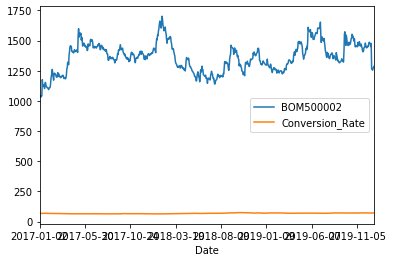

In [0]:
final_df.plot(x='Date',y=['BOM500002','Conversion_Rate'],kind='line')